https://easytide.admiralty.co.uk/?PortID=troiscub  


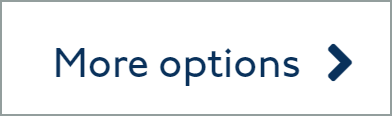
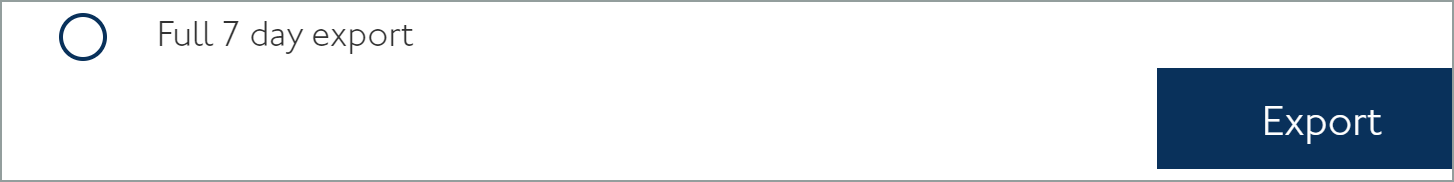

Grab the highlighted section below:   

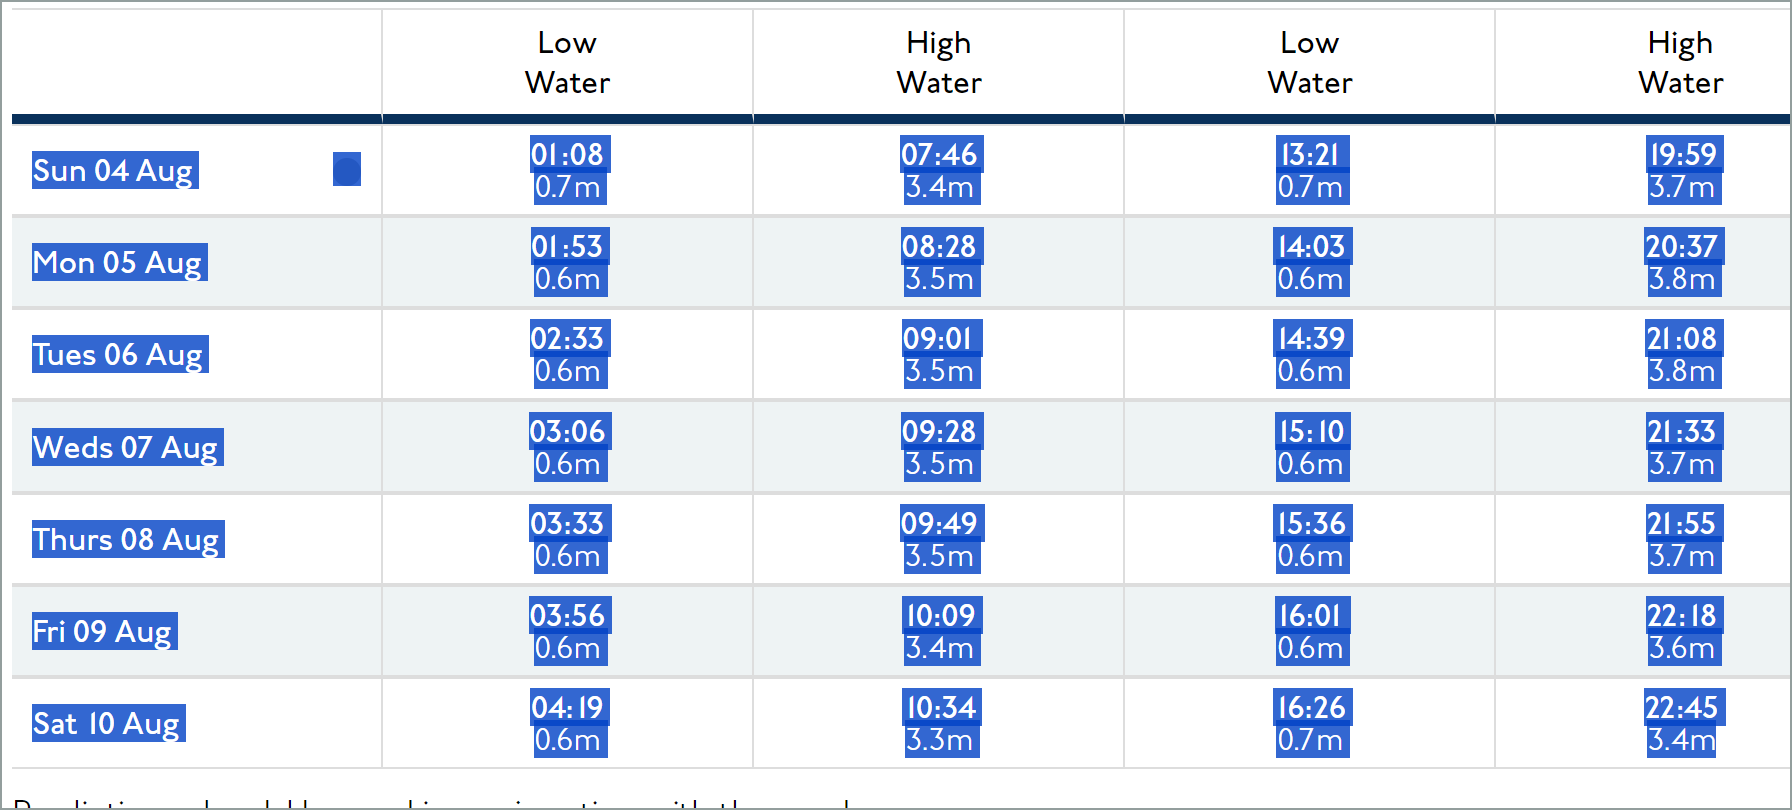

Paste into np++:  
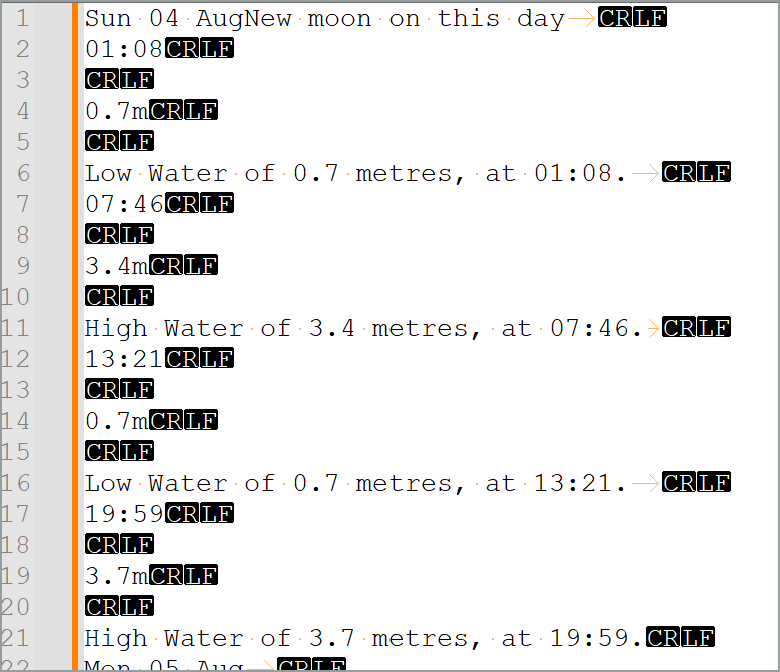

Check that you have grabbed all of the data, so best to include some of the text "Predictions should be read in conjunction with the graph".  


In [169]:
# pip install regex
import re
with open("./hydro_2024.08.04.txt","r") as infile:
    lines = infile.readlines()
print(lines)


['Sun 04 AugNew moon on this day\t\n', '01:08\n', '\n', '0.7m\n', '\n', 'Low Water of 0.7 metres, at 01:08.\t\n', '07:46\n', '\n', '3.4m\n', '\n', 'High Water of 3.4 metres, at 07:46.\t\n', '13:21\n', '\n', '0.7m\n', '\n', 'Low Water of 0.7 metres, at 13:21.\t\n', '19:59\n', '\n', '3.7m\n', '\n', 'High Water of 3.7 metres, at 19:59.\n', 'Mon 05 Aug\t\n', '01:53\n', '\n', '0.6m\n', '\n', 'Low Water of 0.6 metres, at 01:53.\t\n', '08:28\n', '\n', '3.5m\n', '\n', 'High Water of 3.5 metres, at 08:28.\t\n', '14:03\n', '\n', '0.6m\n', '\n', 'Low Water of 0.6 metres, at 14:03.\t\n', '20:37\n', '\n', '3.8m\n', '\n', 'High Water of 3.8 metres, at 20:37.\n', 'Tues 06 Aug\t\n', '02:33\n', '\n', '0.6m\n', '\n', 'Low Water of 0.6 metres, at 02:33.\t\n', '09:01\n', '\n', '3.5m\n', '\n', 'High Water of 3.5 metres, at 09:01.\t\n', '14:39\n', '\n', '0.6m\n', '\n', 'Low Water of 0.6 metres, at 14:39.\t\n', '21:08\n', '\n', '3.8m\n', '\n', 'High Water of 3.8 metres, at 21:08.\n', 'Weds 07 Aug\t\n', '03:0

In [170]:
cleaned_lines = [line.strip() for line in lines]
print(cleaned_lines)

['Sun 04 AugNew moon on this day', '01:08', '', '0.7m', '', 'Low Water of 0.7 metres, at 01:08.', '07:46', '', '3.4m', '', 'High Water of 3.4 metres, at 07:46.', '13:21', '', '0.7m', '', 'Low Water of 0.7 metres, at 13:21.', '19:59', '', '3.7m', '', 'High Water of 3.7 metres, at 19:59.', 'Mon 05 Aug', '01:53', '', '0.6m', '', 'Low Water of 0.6 metres, at 01:53.', '08:28', '', '3.5m', '', 'High Water of 3.5 metres, at 08:28.', '14:03', '', '0.6m', '', 'Low Water of 0.6 metres, at 14:03.', '20:37', '', '3.8m', '', 'High Water of 3.8 metres, at 20:37.', 'Tues 06 Aug', '02:33', '', '0.6m', '', 'Low Water of 0.6 metres, at 02:33.', '09:01', '', '3.5m', '', 'High Water of 3.5 metres, at 09:01.', '14:39', '', '0.6m', '', 'Low Water of 0.6 metres, at 14:39.', '21:08', '', '3.8m', '', 'High Water of 3.8 metres, at 21:08.', 'Weds 07 Aug', '03:06', '', '0.6m', '', 'Low Water of 0.6 metres, at 03:06.', '09:28', '', '3.5m', '', 'High Water of 3.5 metres, at 09:28.', '15:10', '', '0.6m', '', 'Low Wa

In [171]:
high_lows = [line for line in cleaned_lines if line.startswith(("Low","High","Fri","Sat","Sun","Mon","Tue","Wed","Thur"))]
print(high_lows)

['Sun 04 AugNew moon on this day', 'Low Water of 0.7 metres, at 01:08.', 'High Water of 3.4 metres, at 07:46.', 'Low Water of 0.7 metres, at 13:21.', 'High Water of 3.7 metres, at 19:59.', 'Mon 05 Aug', 'Low Water of 0.6 metres, at 01:53.', 'High Water of 3.5 metres, at 08:28.', 'Low Water of 0.6 metres, at 14:03.', 'High Water of 3.8 metres, at 20:37.', 'Tues 06 Aug', 'Low Water of 0.6 metres, at 02:33.', 'High Water of 3.5 metres, at 09:01.', 'Low Water of 0.6 metres, at 14:39.', 'High Water of 3.8 metres, at 21:08.', 'Weds 07 Aug', 'Low Water of 0.6 metres, at 03:06.', 'High Water of 3.5 metres, at 09:28.', 'Low Water of 0.6 metres, at 15:10.', 'High Water of 3.7 metres, at 21:33.', 'Thurs 08 Aug', 'Low Water of 0.6 metres, at 03:33.', 'High Water of 3.5 metres, at 09:49.', 'Low Water of 0.6 metres, at 15:36.', 'High Water of 3.7 metres, at 21:55.', 'Fri 09 Aug', 'Low Water of 0.6 metres, at 03:56.', 'High Water of 3.4 metres, at 10:09.', 'Low Water of 0.6 metres, at 16:01.', 'High 

In [172]:
formatted_tides = []
for line in high_lows:
    words = line.split()
    print(words)
    print("----------")
   
    # If the sentence starts with Sun, Mon, etc, then keep words 1 
    # (date, but not day). Month can be inferred downstream
    if words[0] in ("Sun","Mon","Tues","Weds","Thurs","Fri","Sat"):
        formatted_tides.append("----------------")
        formatted_tides.append(f"{words[1]},")
        continue
    # After previous block, 7 or more words means a High or Low water sentence. 
    # Words 0 (base zero), 3 and 6 are respectively High/Low, tide-height, and 
    # time. Other words and characters are discarded
    if len(words) >= 7:
        formatted_tides.append(f"{words[0]},{words[6].rstrip('.')},{words[3]},")
        continue     
for line in formatted_tides:
    print(line)

['Sun', '04', 'AugNew', 'moon', 'on', 'this', 'day']
----------
['Low', 'Water', 'of', '0.7', 'metres,', 'at', '01:08.']
----------
['High', 'Water', 'of', '3.4', 'metres,', 'at', '07:46.']
----------
['Low', 'Water', 'of', '0.7', 'metres,', 'at', '13:21.']
----------
['High', 'Water', 'of', '3.7', 'metres,', 'at', '19:59.']
----------
['Mon', '05', 'Aug']
----------
['Low', 'Water', 'of', '0.6', 'metres,', 'at', '01:53.']
----------
['High', 'Water', 'of', '3.5', 'metres,', 'at', '08:28.']
----------
['Low', 'Water', 'of', '0.6', 'metres,', 'at', '14:03.']
----------
['High', 'Water', 'of', '3.8', 'metres,', 'at', '20:37.']
----------
['Tues', '06', 'Aug']
----------
['Low', 'Water', 'of', '0.6', 'metres,', 'at', '02:33.']
----------
['High', 'Water', 'of', '3.5', 'metres,', 'at', '09:01.']
----------
['Low', 'Water', 'of', '0.6', 'metres,', 'at', '14:39.']
----------
['High', 'Water', 'of', '3.8', 'metres,', 'at', '21:08.']
----------
['Weds', '07', 'Aug']
----------
['Low', 'Water',

In [173]:
lines2 = [line for line in formatted_tides if not line.startswith('-')]
print(lines2)

['04,', 'Low,01:08,0.7,', 'High,07:46,3.4,', 'Low,13:21,0.7,', 'High,19:59,3.7,', '05,', 'Low,01:53,0.6,', 'High,08:28,3.5,', 'Low,14:03,0.6,', 'High,20:37,3.8,', '06,', 'Low,02:33,0.6,', 'High,09:01,3.5,', 'Low,14:39,0.6,', 'High,21:08,3.8,', '07,', 'Low,03:06,0.6,', 'High,09:28,3.5,', 'Low,15:10,0.6,', 'High,21:33,3.7,', '08,', 'Low,03:33,0.6,', 'High,09:49,3.5,', 'Low,15:36,0.6,', 'High,21:55,3.7,', '09,', 'Low,03:56,0.6,', 'High,10:09,3.4,', 'Low,16:01,0.6,', 'High,22:18,3.6,', '10,', 'Low,04:19,0.6,', 'High,10:34,3.3,', 'Low,16:26,0.7,', 'High,22:45,3.4,']


In [174]:
tide_days = []
data = lines2
day_tides = []
current_day_tide = ""

# Iterate through the data
for item in data:
    # Check if the item has 2 characters (indicating the start of a record)
    if len(item) == 3:
        # If we have a current record, add it to the grouped_records list
        if current_day_tide:
            day_tides.append(current_day_tide)
        # Start a new record
        current_day_tide = item
    else:
        # Concatenate the item to the current record
        current_day_tide += item

# Add the last record (if any) to the grouped_records list
if current_day_tide:
    day_tides.append(current_day_tide)

# Print the grouped records
for tide in day_tides:
    print(tide)

04,Low,01:08,0.7,High,07:46,3.4,Low,13:21,0.7,High,19:59,3.7,
05,Low,01:53,0.6,High,08:28,3.5,Low,14:03,0.6,High,20:37,3.8,
06,Low,02:33,0.6,High,09:01,3.5,Low,14:39,0.6,High,21:08,3.8,
07,Low,03:06,0.6,High,09:28,3.5,Low,15:10,0.6,High,21:33,3.7,
08,Low,03:33,0.6,High,09:49,3.5,Low,15:36,0.6,High,21:55,3.7,
09,Low,03:56,0.6,High,10:09,3.4,Low,16:01,0.6,High,22:18,3.6,
10,Low,04:19,0.6,High,10:34,3.3,Low,16:26,0.7,High,22:45,3.4,


In [175]:
def insert_tidal_range(record):
    # Split the record by commas
    parts = record.split(',')
    
    # Extract the decimal values (skipping the first word)
    values = [float(part) for part in parts[1:] if part.replace('.', '', 1).isdigit()]
    
    # Calculate the difference between the highest and lowest values
    difference = max(values) - min(values)
    
    # Insert the difference between "Low" and "01:53"
    parts.insert(1, f"{difference:.1f}")
    
    # Join the modified parts back into a string
    modified_record = ','.join(parts)
    
    return modified_record

# Example usage:
#record = "05,Low,01:53,0.6,High,08:28,3.5,Low,14:03,0.6,High,20:37,3.8"
#result = insert_tidal_range(record)
#print(result)

In [176]:
# insert the tidal range - this is the difference between the max and
# min tidal heights for the day
tides_with_range = [insert_tidal_range(line) for line in day_tides]
for tide in tides_with_range:
    print(tide)

04,3.0,Low,01:08,0.7,High,07:46,3.4,Low,13:21,0.7,High,19:59,3.7,
05,3.2,Low,01:53,0.6,High,08:28,3.5,Low,14:03,0.6,High,20:37,3.8,
06,3.2,Low,02:33,0.6,High,09:01,3.5,Low,14:39,0.6,High,21:08,3.8,
07,3.1,Low,03:06,0.6,High,09:28,3.5,Low,15:10,0.6,High,21:33,3.7,
08,3.1,Low,03:33,0.6,High,09:49,3.5,Low,15:36,0.6,High,21:55,3.7,
09,3.0,Low,03:56,0.6,High,10:09,3.4,Low,16:01,0.6,High,22:18,3.6,
10,2.8,Low,04:19,0.6,High,10:34,3.3,Low,16:26,0.7,High,22:45,3.4,


In [177]:
# return the usable tides for the day. Assume there are always 2,
# from a set of 4, and sometimes 3. 
# For the 4-set case, I keep the middle two tides.
# More work needed for the 3-set case, as needs more judgment about
# which end-tide to keep.


def get_usable_tides_for_day(record):
     # Split the record by commas
    parts = record.split(',')
    # remove the last tide of the day, as typically, this is not
    # usable:
    parts = parts[:-4] 
    # for a 4-tide day, remove the first tide
    if len(parts) == 11:
        parts = parts[:2] + parts[5:]
    modified_record = ','.join(parts)
    return modified_record

In [178]:
usable_tides = [get_usable_tides_for_day(line) for line in tides_with_range]
for tide in usable_tides:
    print(tide)

04,3.0,High,07:46,3.4,Low,13:21,0.7
05,3.2,High,08:28,3.5,Low,14:03,0.6
06,3.2,High,09:01,3.5,Low,14:39,0.6
07,3.1,High,09:28,3.5,Low,15:10,0.6
08,3.1,High,09:49,3.5,Low,15:36,0.6
09,3.0,High,10:09,3.4,Low,16:01,0.6
10,2.8,High,10:34,3.3,Low,16:26,0.7
